In [1]:
### to train a image we do following step

In [2]:
# load normalize CIFAR10 train and test images; # torchvision

In [3]:
# define a CNNN

In [4]:
# define a loss function

In [5]:
# trian a network on training data

In [6]:
# test the network on test data

In [7]:
import torch

In [8]:
import torchvision 

In [9]:
import torchvision.transforms as transforms

In [10]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [11]:
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)

Files already downloaded and verified


In [12]:
trainloader = torch.utils.data.DataLoader(trainset,
                                         batch_size=4,
                                         shuffle=True,
                                         num_workers=2)

In [13]:
testset = torchvision.datasets.CIFAR10(root='./data', 
                                      train=False,
                                      download=True,
                                      transform=transform)

Files already downloaded and verified


In [14]:
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False,
                                         num_workers=2)

In [15]:
classes = ('plane', 'car', 'bird', 'cat', 
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def imshow(img):
    img = img / 2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [18]:
# getting random training img
dataiter = iter(trainloader)
images, labels = dataiter.next()

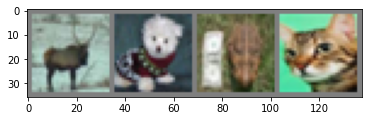

 deer   dog  frog   cat


In [19]:
# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [20]:
### DEFINING CNN 

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


net = Net()

In [23]:
# definie loss function and optimizer

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
# train the network

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.239
[1,  4000] loss: 1.885
[1,  6000] loss: 1.676
[1,  8000] loss: 1.577
[1, 10000] loss: 1.538
[1, 12000] loss: 1.482
[2,  2000] loss: 1.402
[2,  4000] loss: 1.359
[2,  6000] loss: 1.357
[2,  8000] loss: 1.307
[2, 10000] loss: 1.317
[2, 12000] loss: 1.258
[3,  2000] loss: 1.186
[3,  4000] loss: 1.211
[3,  6000] loss: 1.174
[3,  8000] loss: 1.192
[3, 10000] loss: 1.185
[3, 12000] loss: 1.149
[4,  2000] loss: 1.107
[4,  4000] loss: 1.100
[4,  6000] loss: 1.077
[4,  8000] loss: 1.081
[4, 10000] loss: 1.102
[4, 12000] loss: 1.081


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
# testing our model on test data

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] 
                                for j in range(4)))

In [ ]:
# loading saved model

net = Net()
net.load_state_dict(torch.load(PATH))

In [ ]:
# predicting

In [ ]:
outputs = net (images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
# predicting on entire dataset

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' %(
       100 * correct / total))    

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1



for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))